# Loss Landscape Visualization

Plot (pre-computed) loss landscapes stored in `loss_landscape_files`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
%matplotlib inline

## Load loss landscape data

In [5]:
use_model = "unedited"
# use_model = "good_edit"
# use_model = "bad_edit"

n_data = 128
STEPS = 21
DIST = 1
SEED = 543

data_matrix_file = f"loss_landscape_files/data_matrix_{use_model}_random_data_{n_data}_steps_{STEPS}_distance_{DIST}_seed_{SEED}.npy"
data_matrix = np.load(data_matrix_file)
print(data_matrix.shape)

(21, 21)


## Plot loss landscape

[+] loss_landscape_files/loss_landscape_unedited_random_data_128_steps_21_distance_1_seed_543_magma_r.png


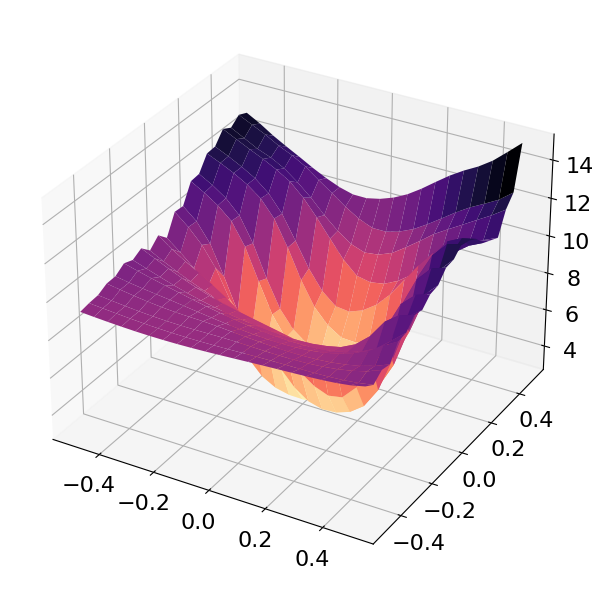

In [6]:
# Select colormap 
cmap = 'magma_r'

# Create figure
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

# Reshape the data_matrix into a 41x41 grid for plotting
Z = data_matrix.reshape((STEPS, STEPS))

# Generate X and Y coordinates (41x41 grid)
x = np.linspace(-DIST/2, DIST/2, STEPS)  
y = np.linspace(-DIST/2, DIST/2, STEPS)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface with filled colors
surf = ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none')

# Add a color bar for reference
# fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Finalize figure
ax.tick_params(labelsize=16)
plt.tight_layout()

# Save figure
save_as_png = f"loss_landscape_files/loss_landscape_{use_model}_random_data_{n_data}_steps_{STEPS}_distance_{DIST}_seed_{SEED}_{cmap}.png"
plt.savefig(save_as_png, dpi=600)
print(f"[+] {save_as_png}")

# Show figure
plt.show()